In [63]:
import pandas as pd
import numpy as np
import wordcloud

import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS
from spacy import displacy

import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
spacy.__version__

'3.8.2'

In [53]:
# Charger le modèle de langue anglais
nlp = spacy.load("en_core_web_sm")

With spacy, you have many languages that you can load.

All you will have to do is to do python -m spacy da_core_web_sm if you want to import danish model.

# Create a Doc object 📄📄

Once you have imported your language, you can create a doc object. This doc is your complete body of text. Once you have instantiated your doc, you will be able to use the full power of spacy.

In [54]:
# Texte à analyser
doc = nlp("Hello World! Don't do this. I am superman wherever you are in the world")

# Affichage des informations
print(f"Tokens: {[token.text for token in doc]}")
print("-" * 12)
print(f"Lemmas: {[token.lemma_ for token in doc]}")
print("-" * 12)
print(f"Indices: {[token.i for token in doc]}")
print("-" * 12)
print(f"Alpha Numeric: {[token.is_alpha for token in doc]}")
print("-" * 12)
print(f"Numbers: {[token.like_num for token in doc]}")

Tokens: ['Hello', 'World', '!', 'Do', "n't", 'do', 'this', '.', 'I', 'am', 'superman', 'wherever', 'you', 'are', 'in', 'the', 'world']
------------
Lemmas: ['hello', 'World', '!', 'do', 'not', 'do', 'this', '.', 'I', 'be', 'superman', 'wherever', 'you', 'be', 'in', 'the', 'world']
------------
Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
------------
Alpha Numeric: [True, True, False, True, False, True, True, False, True, True, True, True, True, True, True, True, True]
------------
Numbers: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


As you can see above, once we created our doc, we were able to extract:

Tokens

Lemmatized tokens

Indices of each token

Booleans that determine whether tokens are words or punctuation (alpha_numeric)

Booleans that determine if the tokens are numbers

Powerful, isn't it? 💪

# Stop Words ⛔⛔

In NLP, stop words are all the linking words, articles and quantifiers that are widely used in a language but which are not in themselves meaningful.

For each language, you have a list of stop words made by spacy.

In [55]:
# Print stop words
print(STOP_WORDS)

{'five', 'beforehand', 'there', 'otherwise', 'has', 'her', 'they', 'two', 'down', 'whenever', '‘ll', 'upon', 'more', 'of', 'beside', 'yet', 'at', 'does', 'take', '’re', 'full', 'around', 'onto', 'this', 'less', 'made', 'seemed', 'for', 'whom', 'his', 'whether', 'who', 'just', 'always', 'that', 'say', 'where', 'besides', '’d', 'whither', 'still', 'toward', 'six', 'through', 'eight', 'was', 'once', 'whatever', 'anywhere', 'put', 'whereafter', 'been', 'seems', 'wherein', 'above', 'what', 'due', 'mine', 'since', 'in', 'then', 'thru', 'serious', "'ll", 'whose', 'eleven', 'herein', 'same', 'whereupon', 'front', 'nowhere', 'ca', 'between', 'top', 'n’t', 'such', "'m", 'now', 'any', 'perhaps', 'our', 'noone', 'whoever', 're', 'call', '‘m', 'us', 'well', 'hence', "'ve", 'twenty', 'three', 'because', 'bottom', 'back', 'please', 'already', 'no', 'she', 'somewhere', 'make', 'myself', 'throughout', 'see', 'enough', 'anyway', 'four', '‘d', 'part', 'which', 'he', 'nine', 'using', 'almost', 'many', 'do

# WordCloud ☁️☁️

One visualization that we do a lot when doing NLP is to create a word cloud. Although it is not directly a spacy method, we thought it was important to show you how to create it via wordcloud and matplotlib.

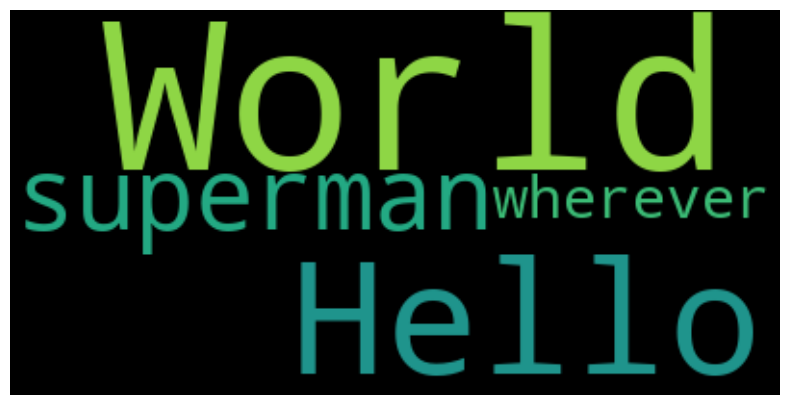

In [56]:
# Instanciate WordCloud 
wd = wordcloud.WordCloud()
cloud = wd.generate(doc.text)

# Afficher le WordCloud avec matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wd, interpolation="bilinear")
plt.axis("off")  # Supprimer les axes pour une meilleure lisibilité
plt.show()

Making a word cloud with stop words can hide important words in a body of text, so here's how you can remove them.

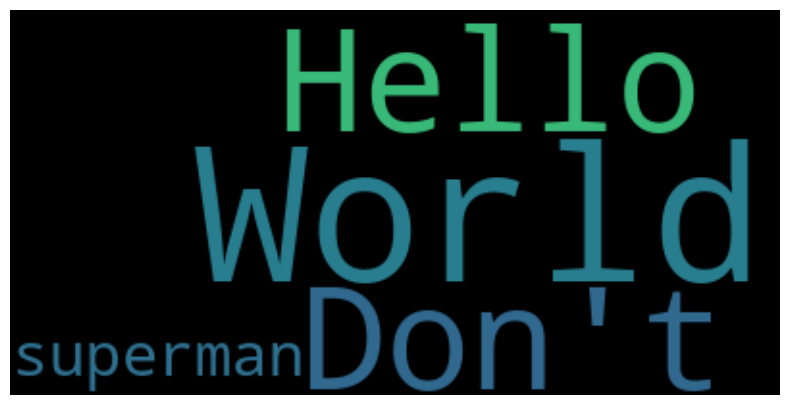

In [57]:
# Instanciate WordCloud 
wd = wordcloud.WordCloud(stopwords=STOP_WORDS)
cloud = wd.generate(doc.text)

# Afficher le WordCloud avec matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wd, interpolation="bilinear")
plt.axis("off")  # Supprimer les axes pour une meilleure lisibilité
plt.show()

# Visualize 🎨🎨

Finally, an interesting feature of spacy is displacy which allows you to see all the relationships between words in a corpus of text. Here's how you can use this visualization.

In [58]:
# Visualisation des dépendances syntaxiques avec displacy
displacy.render(
    doc, 
    style="dep", 
    jupyter=True,  # Afficher dans Jupyter Notebook
    options={"distance": 70}  # Ajuster l'espacement entre les mots
)

# Text Mining with sklearn ⛏️⛏️

Now that we have tokens and we can easily manipulate our corpus of text, let's now sklearn for advanced text mining technics like tf-idf.

In terms of process, we will:

Create an array of documents

Preprocess text (remove punctuation...)

Create a Tf-IDF matrix using sklearn

## Create an array of documents 💌

Let's see with a closer to real-world example where we have different documents. We will then create a pandas dataframe that includes each documents.

In [59]:
# Créer une liste de documents
documents = [
    "Hello World! Don't do this. I am superman wherever you are in the world",
    "Do. Or do not. There is no try.",
    "In my experience there is no such thing as luck.",
    "I find your lack of faith disturbing.",
    "I’ve got a bad feeling about this."
]

# Insérer les documents dans un DataFrame
df = pd.DataFrame({"documents": documents})

# Afficher le DataFrame
print(df)

                                           documents
0  Hello World! Don't do this. I am superman wher...
1                    Do. Or do not. There is no try.
2   In my experience there is no such thing as luck.
3              I find your lack of faith disturbing.
4                 I’ve got a bad feeling about this.


## Preprocessing text 🧽

Now that we have a dataset. Let's go ahead and preprocess it so that we remove punctuation, lower case all characters and remove stop words.

In [60]:
# Obtenir tous les caractères de ponctuation
punctuation = string.punctuation

# Afficher la ponctuation
print(f"Ponctuation à supprimer : {punctuation}")

Ponctuation à supprimer : !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [61]:
# Supprimer la ponctuation et convertir en minuscule
df['clean_documents'] = df['documents'].apply(
    lambda x: re.sub(r'[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+', ' ', x).lower()
)

# Afficher le DataFrame final
print(df)

                                           documents  \
0  Hello World! Don't do this. I am superman wher...   
1                    Do. Or do not. There is no try.   
2   In my experience there is no such thing as luck.   
3              I find your lack of faith disturbing.   
4                 I’ve got a bad feeling about this.   

                                     clean_documents  
0  hello world  don't do this  i am superman wher...  
1                    do  or do not  there is no try   
2   in my experience there is no such thing as luck   
3              i find your lack of faith disturbing   
4                 i’ve got a bad feeling about this   


In [62]:
# Tokenisation, lemmatisation et suppression des stop words
df['tokenized_doc'] = df['clean_documents'].apply(
    lambda x: [token.lemma_ for token in nlp(x) if token.text.lower() not in STOP_WORDS]
)

# Afficher les résultats
print(df[['clean_documents', 'tokenized_doc']])

                                     clean_documents  \
0  hello world  don't do this  i am superman wher...   
1                    do  or do not  there is no try    
2   in my experience there is no such thing as luck    
3              i find your lack of faith disturbing    
4                 i’ve got a bad feeling about this    

                           tokenized_doc  
0  [hello, world,  ,  , superman, world]  
1                            [ ,  , try]  
2              [experience, thing, luck]  
3           [find, lack, faith, disturb]  
4                    [get, bad, feeling]  


## Create TF-IDF matrix 🍍

Finally, let's create a tf-idf matrix where we can classify each word's importance.

In [66]:
# Initialiser le TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Appliquer TF-IDF sur la colonne 'clean_documents'
X = vectorizer.fit_transform(df['clean_documents'])

# Convertir le résultat en un tableau dense
dense = X.toarray()
dense

array([[0.        , 0.        , 0.37796447, 0.        , 0.        ,
        0.        , 0.        , 0.37796447, 0.        , 0.        ,
        0.37796447, 0.        , 0.        , 0.        , 0.75592895],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.57735027, 0.        , 0.        , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.57735027,
        0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [67]:
# Récupérer le vocabulaire
vocab = vectorizer.vocabulary_

# Afficher le vocabulaire
print("Vocabulaire (token -> index) :")
print(vocab)

# Afficher les mots dans l'ordre
print("\nMots dans l'ordre des indices :")
sorted_vocab = sorted(vocab.items(), key=lambda x: x[1])
print(sorted_vocab)

Vocabulaire (token -> index) :
{'hello': 7, 'world': 14, 'don': 2, 'superman': 10, 'try': 12, 'experience': 3, 'thing': 11, 'luck': 9, 'lack': 8, 'faith': 4, 'disturbing': 1, 've': 13, 'got': 6, 'bad': 0, 'feeling': 5}

Mots dans l'ordre des indices :
[('bad', 0), ('disturbing', 1), ('don', 2), ('experience', 3), ('faith', 4), ('feeling', 5), ('got', 6), ('hello', 7), ('lack', 8), ('luck', 9), ('superman', 10), ('thing', 11), ('try', 12), ('ve', 13), ('world', 14)]


In [68]:
# Afficher les résultats sous forme de DataFrame pour plus de lisibilité
tfidf_df = pd.DataFrame(dense, columns=vectorizer.get_feature_names_out())
print(tfidf_df)

   bad  disturbing       don  experience    faith  feeling  got     hello  \
0  0.0     0.00000  0.377964     0.00000  0.00000      0.0  0.0  0.377964   
1  0.0     0.00000  0.000000     0.00000  0.00000      0.0  0.0  0.000000   
2  0.0     0.00000  0.000000     0.57735  0.00000      0.0  0.0  0.000000   
3  0.0     0.57735  0.000000     0.00000  0.57735      0.0  0.0  0.000000   
4  0.5     0.00000  0.000000     0.00000  0.00000      0.5  0.5  0.000000   

      lack     luck  superman    thing  try   ve     world  
0  0.00000  0.00000  0.377964  0.00000  0.0  0.0  0.755929  
1  0.00000  0.00000  0.000000  0.00000  1.0  0.0  0.000000  
2  0.00000  0.57735  0.000000  0.57735  0.0  0.0  0.000000  
3  0.57735  0.00000  0.000000  0.00000  0.0  0.0  0.000000  
4  0.00000  0.00000  0.000000  0.00000  0.0  0.5  0.000000  


Here, we can see that doc1 is described as a mixing of "don", "hello", "superman", and "world", the latter being twice more important as the other ones (because it has been found twice in the document)